# 泰坦尼克号生还者预测
赛题地址：https://www.kaggle.com/c/titanic

## 题目描述
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## 题目分析
这是一个二分类问题。

## 加载数据

## 查看数据
前10条数据，后10条数据，行数列数，空值情况，基本统计信息（info()和describe()）

## 分析数据
分析选择出可能对结果有影响的特征，一类使用，二类备选，三类抛弃。

## 绘图
对选择的数据进行绘图，直观感受数据特点，通过图像分析数据。

## 数据清洗
去掉无用特征，空值处理

## 特征处理
特征主要有数值型、类别型、时间型、文本型、统计型和组合型。本例中主要有数值型和类别性，数值型的处理方式为离散化，类别性的处理方式为one-hot编码。

## 选择模型
根据问题性质，选择合适的模型，本例中选择逻辑回归模型。

## 训练模型

## 测试模型

## 模型状态
绘制学习曲线，判断是否欠拟合和过拟合

## 优化
调整参数。

## 导出预测结果数据

In [38]:
# 加载需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载训练数据
train = pd.read_csv(u'train.csv')

# 查看数据基本情况
print('shape:',train.shape)
train.info()
train.describe()

shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
# 看看这些字段，分别有多少种取值(甚至你可以看看分布)
var = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for v in var:
    print('\n%s这一列数据的不同取值和出现的次数\n'%v)
    print(train[v].value_counts())


Survived这一列数据的不同取值和出现的次数

0    549
1    342
Name: Survived, dtype: int64

Pclass这一列数据的不同取值和出现的次数

3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex这一列数据的不同取值和出现的次数

male      577
female    314
Name: Sex, dtype: int64

SibSp这一列数据的不同取值和出现的次数

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch这一列数据的不同取值和出现的次数

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Embarked这一列数据的不同取值和出现的次数

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [41]:
# 加载测试数据
test = pd.read_csv(u'test.csv')
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [42]:
# 合成一个总的data
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(1309, 13)

In [43]:
# 优先考虑Pclass、Sex、Age、Fare、Embarked
data = data.loc[:,['PassengerId','Pclass','Sex','Age','Fare','Embarked','Survived']]

In [44]:
data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived
0,1,3,male,22.0,7.2500,S,0.0
1,2,1,female,38.0,71.2833,C,1.0
2,3,3,female,26.0,7.9250,S,1.0
3,4,1,female,35.0,53.1000,S,1.0
4,5,3,male,35.0,8.0500,S,0.0
5,6,3,male,NaN,8.4583,Q,0.0
6,7,1,male,54.0,51.8625,S,0.0
7,8,3,male,2.0,21.0750,S,0.0
8,9,3,female,27.0,11.1333,S,1.0
9,10,2,female,14.0,30.0708,C,1.0


In [45]:
# Sex变成数值型
data = data.replace({'Sex':'female'},0)
data = data.replace({'Sex':'male'},1)
data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived
0,1,3,1,22.0,7.2500,S,0.0
1,2,1,0,38.0,71.2833,C,1.0
2,3,3,0,26.0,7.9250,S,1.0
3,4,1,0,35.0,53.1000,S,1.0
4,5,3,1,35.0,8.0500,S,0.0
5,6,3,1,NaN,8.4583,Q,0.0
6,7,1,1,54.0,51.8625,S,0.0
7,8,3,1,2.0,21.0750,S,0.0
8,9,3,0,27.0,11.1333,S,1.0
9,10,2,0,14.0,30.0708,C,1.0


In [46]:
# Age空值处理，当做一个类别
# inplace=True代表直接在data_train里替换
data.fillna({'Age':-1},inplace=True)
data.head(10)

# Age离散化
# bins = [-1,0,10,20,30,40,50,60,70,80]
# age_cats = pd.cut(data['Age'],bins,right=False)
# print(age_cats)
# data['AgeCat'] = age_cats

data.loc[data['Age'] < 0, 'Age'] = 0
data.loc[(data['Age'] >= 0) & (data['Age'] < 16), 'Age'] = 1
data.loc[(data['Age'] >= 16) & (data['Age'] < 40), 'Age'] = 2
data.loc[(data['Age'] >= 40) & (data['Age'] < 50), 'Age'] = 3
data.loc[(data['Age'] >= 50) & (data['Age'] <= 80), 'Age'] = 4

data.head(10)

# Embarked中S最多，所以空值填充S,Fare空值填充0
data.fillna({'Embarked':'S','Fare':0},inplace=True)

# Sex、Age和Embarked one-hot编码
# Sex不进行one-hot编码也可以，但是准确率特别低
dummies_Sex = pd.get_dummies(data['Sex'],prefix='Sex')
dummies_Age = pd.get_dummies(data['Age'], prefix= 'Age')
dummies_Embarked = pd.get_dummies(data['Embarked'],prefix='Embarked')

data = pd.concat([data,dummies_Sex, dummies_Age, dummies_Embarked], axis=1)
data.drop(['Age','Embarked'], axis=1, inplace=True)
data.head(10)


,PassengerId,Pclass,Sex,Fare,Survived,Sex_0,Sex_1,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,7.2500,0.0,0,1,0,1,0,0,0,0,1
1,2,1,0,71.2833,1.0,1,0,0,1,0,0,1,0,0
2,3,3,0,7.9250,1.0,1,0,0,1,0,0,0,0,1
3,4,1,0,53.1000,1.0,1,0,0,1,0,0,0,0,1
4,5,3,1,8.0500,0.0,0,1,0,1,0,0,0,0,1
5,6,3,1,8.4583,0.0,0,1,1,0,0,0,0,1,0
6,7,1,1,51.8625,0.0,0,1,0,0,0,1,0,0,1
7,8,3,1,21.0750,0.0,0,1,1,0,0,0,0,0,1
8,9,3,0,11.1333,1.0,1,0,0,1,0,0,0,0,1
9,10,2,0,30.0708,1.0,1,0,1,0,0,0,1,0,0


In [47]:
# 对Fare进行特征缩放到[-1,1]之内
fare_scaled = (data['Fare']-32.2)/512.33
data['Fare_scaled'] = fare_scaled
data.head(10)

,PassengerId,Pclass,Sex,Fare,Survived,Sex_0,Sex_1,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Embarked_C,Embarked_Q,Embarked_S,Fare_scaled
0,1,3,1,7.2500,0.0,0,1,0,1,0,0,0,0,1,-0.048699
1,2,1,0,71.2833,1.0,1,0,0,1,0,0,1,0,0,0.076285
2,3,3,0,7.9250,1.0,1,0,0,1,0,0,0,0,1,-0.047382
3,4,1,0,53.1000,1.0,1,0,0,1,0,0,0,0,1,0.040794
4,5,3,1,8.0500,0.0,0,1,0,1,0,0,0,0,1,-0.047138
5,6,3,1,8.4583,0.0,0,1,1,0,0,0,0,1,0,-0.046341
6,7,1,1,51.8625,0.0,0,1,0,0,0,1,0,0,1,0.038379
7,8,3,1,21.0750,0.0,0,1,1,0,0,0,0,0,1,-0.021715
8,9,3,0,11.1333,1.0,1,0,0,1,0,0,0,0,1,-0.041119
9,10,2,0,30.0708,1.0,1,0,1,0,0,0,1,0,0,-0.004156


In [48]:
# 把data由train（891条记录）和test（418条记录）组成，现在拆分成train和test
train = data[:891]
test = data[891:]

# train又可以拆分为训练集和测试集
train_train = train[:800]
train_test = train[800:]
train.shape,test.shape,train_train.shape,train_test.shape

((891, 15), (418, 15), (800, 15), (91, 15))

In [49]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

train_train_filter = train_train.filter(regex='Survived|Age_.*|Sex_.*|Embarked_.*|Pclass_.*|Fare_scaled')
train_train_np = train_train_filter.as_matrix()

# y即Survival结果
y = train_train_np[:, 0]

# X即特征属性值
X = train_train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [50]:
train_test_filter = train_test.filter(regex='Age_.*|Sex_.*|Embarked_.*|Pclass_.*|Fare_scaled')
predictions = clf.predict(train_test_filter)
result = pd.DataFrame({'PassengerId':train_test['PassengerId'].as_matrix(), 'Survived':train_test['Survived'],'Prediction':predictions.astype(np.int32)})
result.head()

,PassengerId,Prediction,Survived
800,801,0,0.0
801,802,1,1.0
802,803,0,1.0
803,804,0,1.0
804,805,0,1.0


In [51]:
# 计算正确率
result['Rate'] = result['Prediction']-result['Survived']
result.Rate[result.Rate==0].value_counts()
result['Rate'][result.Rate==0].value_counts()
result['Rate'].value_counts()
accuracy = sum(result['Prediction'] == result['Survived']) / len(result)
print(accuracy)

0.7692307692307693


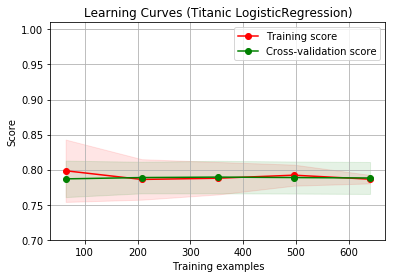

In [52]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
    

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

train_train_filter = train_train.filter(regex='Survived|Age_.*|Sex_.*|Embarked_.*|Pclass_.*|Fare_scaled')
train_train_np = train_train_filter.as_matrix()

# y即Survival结果
y = train_train_np[:, 0]

# X即特征属性值
X = train_train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)


title = "Learning Curves (Titanic LogisticRegression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

## 绘制学习曲线

Automatically created module for IPython interactive environment


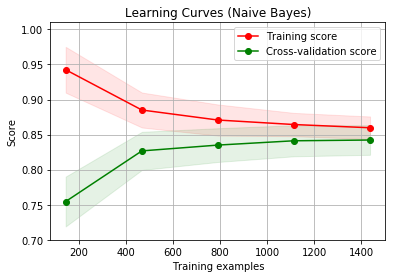

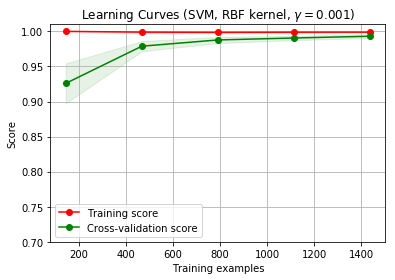

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

## 使用全部训练数据训练模型，生成结果文件

In [20]:
train_filter = train.filter(regex='Survived|Age_.*|Sex_.*|Embarked_.*|Pclass_.*|Fare_scaled')
train_np = train_filter.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

test_filter = test.filter(regex='Age_.*|Sex_.*|Embarked_.*|Pclass_.*|Fare_scaled')
predictions = clf.predict(test_filter)
result = pd.DataFrame({'PassengerId':test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("output.csv", index=False)
# 本结果的public score为0.76555

## 更换训练模型

In [ ]:
# 使用随机森林建模
from sklearn import linear_model

train_train_filter = train_train.filter(regex='Survived|Age_.*|Sex_.*|Embarked_.*|Pclass_.*|Fare_scaled')
train_train_np = train_train_filter.as_matrix()

# y即Survival结果
y = train_train_np[:, 0]

# X即特征属性值
X = train_train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

train_test_filter = train_test.filter(regex='Age_.*|Sex_.*|Embarked_.*|Pclass_.*|Fare_scaled')
predictions = clf.predict(train_test_filter)
result = pd.DataFrame({'PassengerId':train_test['PassengerId'].as_matrix(), 'Survived':train_test['Survived'],'Prediction':predictions.astype(np.int32)})
result.head()